In [ ]:
# load required packages -----
library(stringr)
library(httr)
library(tidyverse)
library(lubridate)
library(dplyr)
library(rmarkdown)
library(knitr)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ forcats 0.5.2 
✔ readr   2.1.3      

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Loading required package: timechange


Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [ ]:
install.packages("forecast")
library(forecast)
install.packages("xts")
library(xts)


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘Rcpp’, ‘timeDate’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘xts’


The following objects are masked from ‘package:dplyr’:

    first, last




In [ ]:
library(cluster)    # clustering algorithms
install.packages("factoextra")
library(factoextra)
install.packages("geosphere")
library(geosphere)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SparseM’, ‘MatrixModels’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘lme4’, ‘htmlwidgets’, ‘crosstalk’, ‘promises’, ‘estimability’, ‘numDeriv’, ‘mvtnorm’, ‘corrplot’, ‘viridis’, ‘car’, ‘DT’, ‘ellipse’, ‘emmeans’, ‘flashClust’, ‘leaps’, ‘multcompView’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘gridExtra’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’


Welcome! Want to learn more? See two factoextra-related books at https://goo.gl/ve3WBa

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘sp’




In [ ]:
divvy <- read_csv("bicycle_weather.csv")


Rows: 3667294 Columns: 17
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (6): rideable_type, start_station_name, end_station_name, member_casual...
dbl  (8): start_lat, start_lng, end_lat, end_lng, ride_duration, year, month...
dttm (2): started_at, ended_at
date (1): start_date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [ ]:
# str() to display the structure of bicycle_data
str(divvy)

spc_tbl_ [3,667,294 × 17] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ rideable_type     : chr [1:3667294] "docked_bike" "docked_bike" "docked_bike" "docked_bike" ...
 $ started_at        : POSIXct[1:3667294], format: "2020-04-26 17:45:14" "2020-04-17 17:08:54" ...
 $ ended_at          : POSIXct[1:3667294], format: "2020-04-26 18:12:03" "2020-04-17 17:17:03" ...
 $ start_station_name: chr [1:3667294] "Eckhart Park" "Drake Ave & Fullerton Ave" "McClurg Ct & Erie St" "California Ave & Division St" ...
 $ end_station_name  : chr [1:3667294] "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" "Indiana Ave & Roosevelt Rd" "Wood St & Augusta Blvd" ...
 $ start_lat         : num [1:3667294] 41.9 41.9 41.9 41.9 41.9 ...
 $ start_lng         : num [1:3667294] -87.7 -87.7 -87.6 -87.7 -87.6 ...
 $ end_lat           : num [1:3667294] 41.9 41.9 41.9 41.9 42 ...
 $ end_lng           : num [1:3667294] -87.7 -87.7 -87.6 -87.7 -87.7 ...
 $ member_casual     : chr [1:3667294] "member" "member" "member" "membe

In [ ]:
# display column names and summary
colnames(divvy)

[1] "rideable_type"      "started_at"         "ended_at"          
 [4] "start_station_name" "end_station_name"   "start_lat"         
 [7] "start_lng"          "end_lat"            "end_lng"           
[10] "member_casual"      "week_days"          "ride_duration"     
[13] "start_date"         "week"               "year"              
[16] "month"              "day"

In [ ]:
summary(divvy)

 rideable_type        started_at                    
 Length:3667294     Min.   :2020-04-01 00:00:30.00  
 Class :character   1st Qu.:2020-07-17 19:53:12.00  
 Mode  :character   Median :2020-09-04 00:42:46.50  
                    Mean   :2020-09-29 07:16:42.08  
                    3rd Qu.:2020-11-12 12:08:15.00  
                    Max.   :2021-05-31 23:53:35.00  
    ended_at                      start_station_name end_station_name  
 Min.   :2020-04-01 00:10:45.00   Length:3667294     Length:3667294    
 1st Qu.:2020-07-17 20:27:32.00   Class :character   Class :character  
 Median :2020-09-04 01:18:04.00   Mode  :character   Mode  :character  
 Mean   :2020-09-29 07:41:51.61                                        
 3rd Qu.:2020-11-12 12:24:54.25                                        
 Max.   :2021-06-08 13:37:43.00                                        
   start_lat       start_lng         end_lat         end_lng      
 Min.   :41.65   Min.   :-87.77   Min.   :41.65   Min.   :

In [ ]:
tail(divvy)

rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,week_days,ride_duration,start_date,week,year,month,day
<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>
classic_bike,2021-05-02 18:05:56,2021-05-02 18:22:03,Clark St & Lincoln Ave,Stockton Dr & Wrightwood Ave,41.91569,-87.63460,41.93132,-87.63874,member,Sunday,0.26861111,2021-05-02,weekend,2021,5,2
classic_bike,2021-05-27 09:30:38,2021-05-27 09:44:36,Dayton St & North Ave,Winchester Ave & Elston Ave,41.91058,-87.64942,41.92409,-87.67646,member,Thursday,0.23277778,2021-05-27,weekday,2021,5,27
electric_bike,2021-05-03 15:06:58,2021-05-03 15:12:54,Clark St & Winnemac Ave,Clark St & Montrose Ave,41.97332,-87.66770,41.96164,-87.66621,casual,Monday,0.09888889,2021-05-03,weekday,2021,5,3
electric_bike,2021-05-01 12:55:40,2021-05-01 13:03:49,Clark St & Lincoln Ave,Stockton Dr & Wrightwood Ave,41.91574,-87.63464,41.93124,-87.63878,casual,Saturday,0.13583333,2021-05-01,weekend,2021,5,1
electric_bike,2021-05-14 18:45:02,2021-05-14 18:51:17,Clark St & Winnemac Ave,Clark St & Montrose Ave,41.97338,-87.66784,41.96163,-87.66616,casual,Friday,0.10416667,2021-05-14,weekday,2021,5,14
classic_bike,2021-05-01 01:20:34,2021-05-01 01:33:40,Clark St & Lincoln Ave,Stockton Dr & Wrightwood Ave,41.91569,-87.63460,41.93132,-87.63874,casual,Saturday,0.21833333,2021-05-01,weekend,2021,5,1


In [ ]:
#gives type of bicycle_data
class(divvy)

[1] "spec_tbl_df" "tbl_df"      "tbl"         "data.frame"

In [ ]:
sum(is.na(divvy))

[1] 0

'rideable_type''started_at''ended_at''start_station_name''end_station_name''start_lat''start_lng''end_lat''end_lng''member_casual''week_days''ride_duration''start_date''week''year''month''day'

In [ ]:
divvy <- divvy[divvy$start_station_name	!= '', ] 
divvy <- divvy[divvy$end_station_name	!= '', ]

In [ ]:
## Find the number of check-outs per station
start_station_name <- unique(divvy$start_station_name)
head(start_station_name)

# ## Find the number of check-ins per station
end_station_name <- unique(divvy$end_station_name)
head(end_station_name)

[1] "Eckhart Park"                        "Drake Ave & Fullerton Ave"          
[3] "McClurg Ct & Erie St"                "California Ave & Division St"       
[5] "Rush St & Hubbard St"                "Mies van der Rohe Way & Chicago Ave"

[1] "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park"            
[3] "Indiana Ave & Roosevelt Rd"  "Wood St & Augusta Blvd"     
[5] "Sheridan Rd & Lawrence Ave"  "Streeter Dr & Grand Ave"

In [ ]:
str(start_station_name)
str(end_station_name)
start_station_name[!(start_station_name %in% end_station_name)]
end_station_name[!(end_station_name %in% start_station_name)]

 chr [1:710] "Eckhart Park" "Drake Ave & Fullerton Ave" ...
 chr [1:712] "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" ...


[1] "hubbard_test_lws" "Altgeld Gardens"

[1] "Avenue L & 114th St"                             
[2] "N Damen Ave & W Wabansia St"                     
[3] "N Clark St & W Elm St"                           
[4] "Woodlawn & 103rd - Olive Harvey Vaccination Site"

In [ ]:
# # Remove row based on condition
# divvy <- divvy[divvy$start_station_name	!= 'hubbard_test_lws', ] 
# divvy <- divvy[divvy$start_station_name	!= 'Altgeld Gardens', ] 
# divvy <- divvy[divvy$end_station_name	!= 'Avenue L & 114th St', ] 
# divvy <- divvy[divvy$end_station_name	!= 'N Damen Ave & W Wabansia St', ] 
# divvy <- divvy[divvy$end_station_name	!= 'N Clark St & W Elm St', ] 
# divvy <- divvy[divvy$end_station_name	!= 'Woodlawn & 103rd - Olive Harvey Vaccination Site', ] 
 
# start_station_name <- unique(divvy$start_station_name)
# end_station_name <- unique(divvy$end_station_name)

# str(start_station_name)
# str(end_station_name)

 chr [1:708] "Eckhart Park" "Drake Ave & Fullerton Ave" ...
 chr [1:708] "Lincoln Ave & Diversey Pkwy" "Kosciuszko Park" ...


In [ ]:
#Top 5 stations with most check outs
start_station_counts <- divvy %>% group_by(start_station_name) %>% summarise(n = n()) %>% ungroup() %>% arrange(desc(n))
head(start_station_counts, 5)
#Top 5 stations with least check outs
tail(start_station_counts, 200)

start_station_name,n
<chr>,<int>
Streeter Dr & Grand Ave,39923
Clark St & Elm St,36247
Lake Shore Dr & Monroe St,35007
Theater on the Lake,34500
Lake Shore Dr & North Blvd,30410


start_station_name,n
<chr>,<int>
Drake Ave & Addison St,568
Ridge Blvd & Howard St,568
Eberhart Ave & 61st St,547
Austin Blvd & Lake St,533
Kilbourn Ave & Irving Park Rd,514
Fairfield Ave & Roosevelt Rd,509
Knox Ave & Montrose Ave,509
Central Park Ave & Ogden Ave,496
Stony Island Ave & 64th St,496


In [ ]:
#Top 5 stations with most check ins 
end_station_counts <- divvy %>% group_by(end_station_name) %>% summarise(n = n()) %>% ungroup() %>% arrange(desc(n))
head(end_station_counts, 5)
#Top 5 stations with least check ins 
tail(end_station_counts, 200)

end_station_name,n
<chr>,<int>
Streeter Dr & Grand Ave,42431
Theater on the Lake,35828
Clark St & Elm St,35090
Lake Shore Dr & Monroe St,34889
Lake Shore Dr & North Blvd,30491


end_station_name,n
<chr>,<int>
Ridge Blvd & Touhy Ave,560
Fairfield Ave & Roosevelt Rd,553
Prairie Ave & Garfield Blvd,550
Kilbourn Ave & Irving Park Rd,546
Knox Ave & Montrose Ave,541
Stony Island Ave & 71st St,502
Sacramento Blvd & Franklin Blvd,501
Drake Ave & Addison St,500
Stony Island Ave & 64th St,499


In [ ]:
head(divvy,5)

rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,week_days,ride_duration,start_date,week,year,month,day
<chr>,<dttm>,<dttm>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<date>,<chr>,<dbl>,<dbl>,<dbl>
docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,Lincoln Ave & Diversey Pkwy,41.8964,-87.6610,41.9322,-87.6586,member,Sunday,0.4469444,2020-04-26,weekend,2020,4,26
docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,Kosciuszko Park,41.9244,-87.7154,41.9306,-87.7238,member,Friday,0.1358333,2020-04-17,weekday,2020,4,17
docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,Indiana Ave & Roosevelt Rd,41.8945,-87.6179,41.8679,-87.6230,member,Wednesday,0.2397222,2020-04-01,weekday,2020,4,1
docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,Wood St & Augusta Blvd,41.9030,-87.6975,41.8992,-87.6722,member,Tuesday,0.2033333,2020-04-07,weekday,2020,4,7
docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,Sheridan Rd & Lawrence Ave,41.8902,-87.6262,41.9695,-87.6547,casual,Saturday,0.8819444,2020-04-18,weekend,2020,4,18


In [ ]:
## Find the number of unique days
unique_days <- unique(divvy$start_date)
head(unique_days)
str(unique_days)

[1] "2020-04-26" "2020-04-17" "2020-04-01" "2020-04-07" "2020-04-18"
[6] "2020-04-30"

 Date[1:424], format: "2020-04-26" "2020-04-17" "2020-04-01" "2020-04-07" "2020-04-18" ...


In [ ]:
#total rented duration per day
duration_per_day <- divvy %>% group_by(start_date) %>% summarise(ride_duration = sum(ride_duration))%>% ungroup()
head(duration_per_day)
class(duration_per_day)

start_date,ride_duration
<date>,<dbl>
2020-04-01,771.1397
2020-04-02,2059.0081
2020-04-03,3990.6828
2020-04-04,1854.5689
2020-04-05,1352.2253
2020-04-06,1204.7522


[1] "tbl_df"     "tbl"        "data.frame"

In [ ]:
duration_per_day <- duration_per_day %>%
            filter(ride_duration > 0)


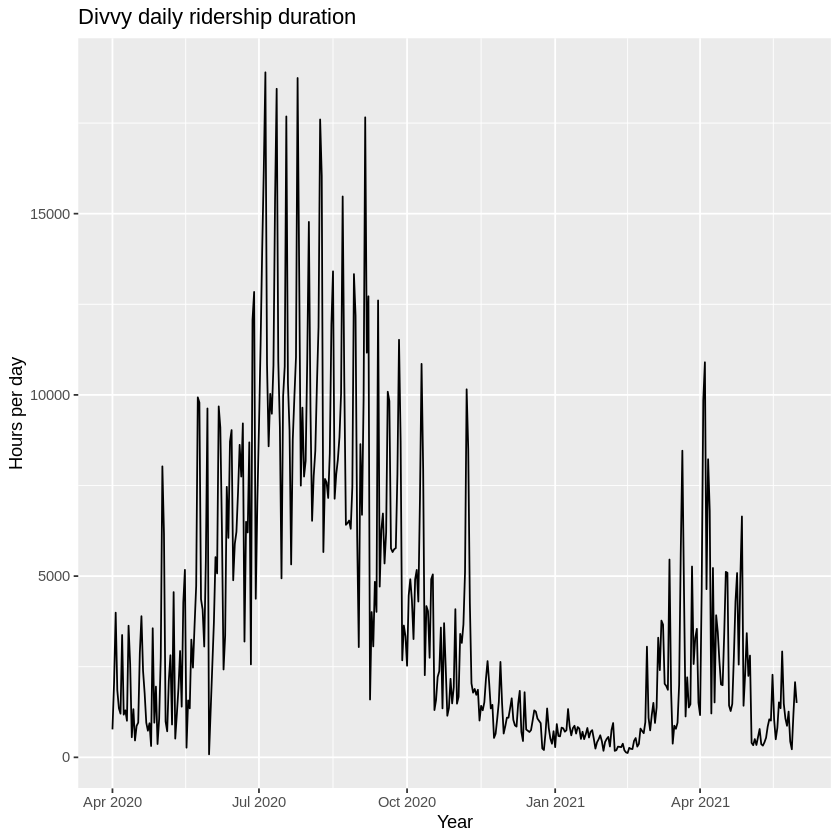

In [ ]:
divvy_xts <- xts(duration_per_day$ride_duration, order.by = duration_per_day$start_date)
fig1 <- autoplot(divvy_xts) + ggtitle("Divvy daily ridership duration") + ylab("Hours per day") + xlab("Year")
fig1


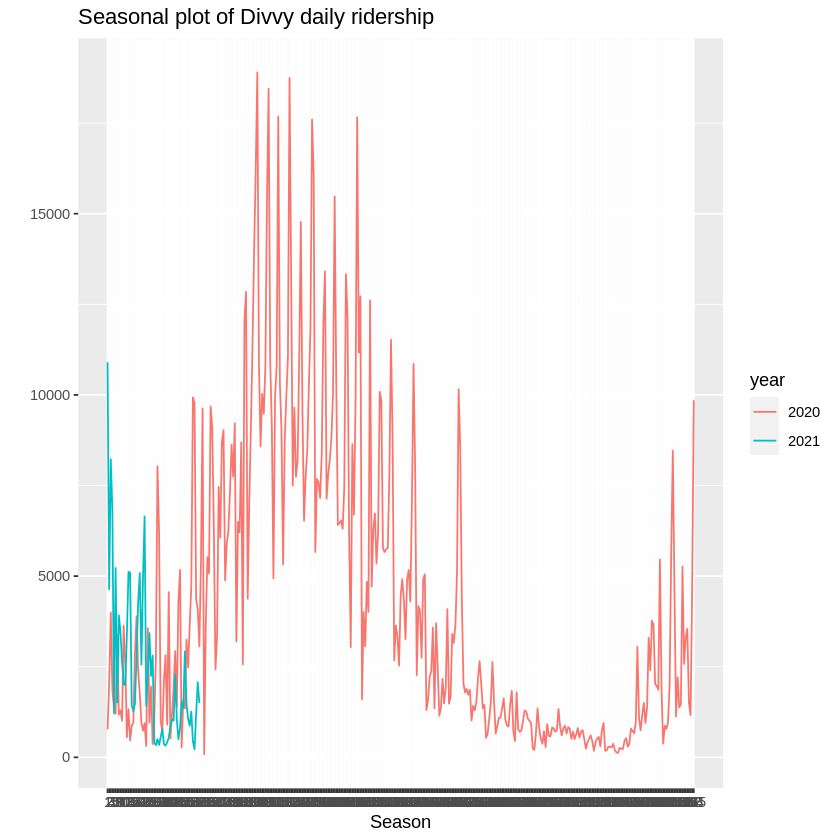

In [ ]:
divvy_ts <- ts(divvy_xts, start = 2020, frequency = 365)
fig2 <- ggseasonplot(divvy_ts) + ggtitle("Seasonal plot of Divvy daily ridership")
fig2

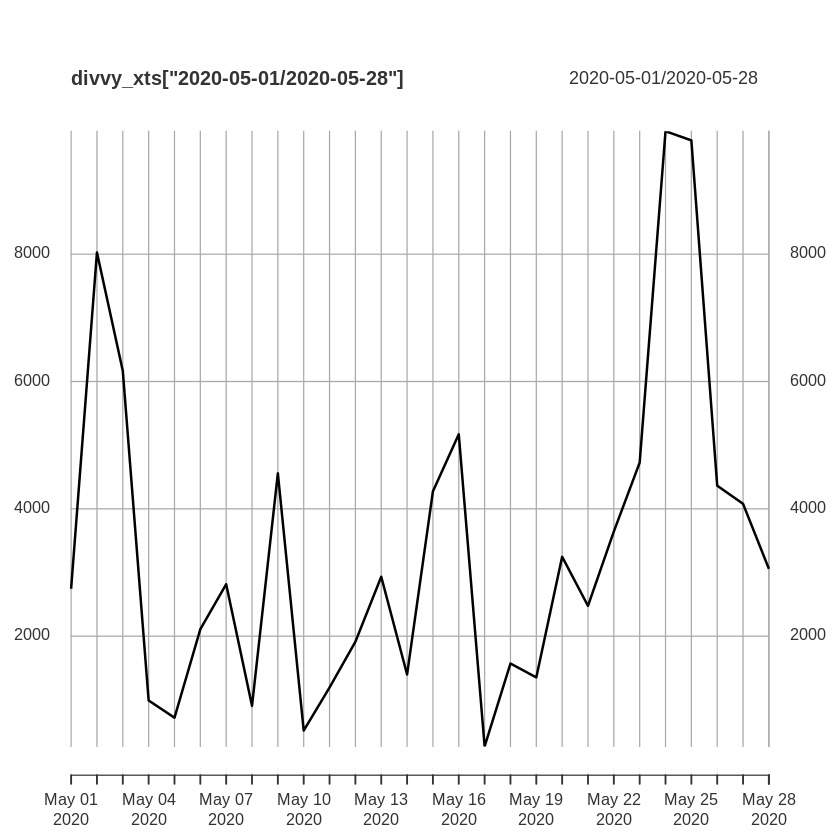

In [ ]:
plot(divvy_xts['2020-05-01/2020-05-28'])


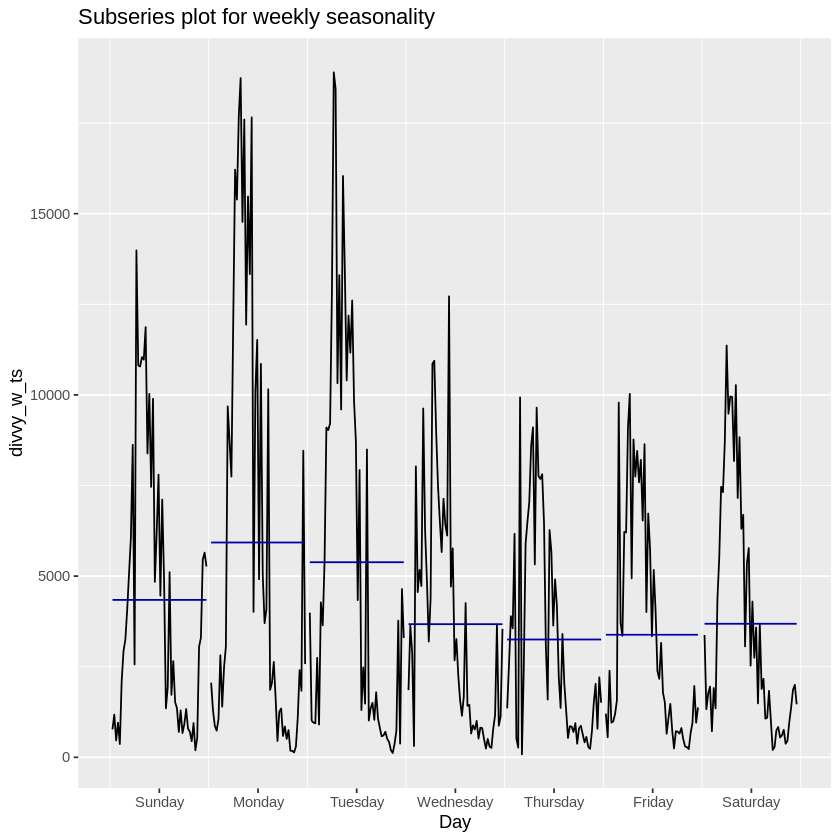

In [ ]:
divvy_w_ts <- ts(divvy_xts['2020-04-01/2021-03-31'], start = c(2020, 1), frequency = 7)
fig3 <- ggsubseriesplot(divvy_w_ts) + ggtitle("Subseries plot for weekly seasonality")
fig3

In [ ]:
divvy_w <- divvy %>% group_by(week = as.POSIXct(cut(start_date, "week"))) %>% summarise(weekly_rides = sum(ride_duration)) 
divvy_m <- divvy %>% group_by(month = as.POSIXct(cut(start_date, "month"))) %>% summarise(monthly_rides = sum(ride_duration))

In [ ]:
divvy_d_test <- divvy_xts['2020-10-01/2021-03-31']
divvy_w_test <- divvy_w %>% filter(week >= "2020-10-01")
divvy_m_test <- divvy_m %>% filter(month >= "2020-10-01")

divvy_d_train <- divvy_xts['2020/2020-10-01']
divvy_w_train <- divvy_w %>% filter(week < "2020-10-01")
divvy_m_train <- divvy_m %>% filter(month < "2020-10-01")

divvy_m_train <- xts(divvy_m_train$monthly_rides, order.by = divvy_m_train$month)

In [ ]:
d_ts <- ts(divvy_m_train, start = 2020, frequency = 12)
fit1 <- ets(d_ts, damped = TRUE)
summary(fit1)

Warning message in ets(d_ts, damped = TRUE):
“Not enough data to use damping”


ETS(A,A,N) 

Call:
 ets(y = d_ts, damped = TRUE) 

  Smoothing parameters:
    alpha = 0.0962 
    beta  = 1 

  Initial states:
    l = 50221.5739 
    b = 59821.5944 

  sigma:  83414.45
Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE MASE       ACF1
Training set -34102.96 83414.45 66459.49 -37.54637 46.86938  NaN 0.08220422

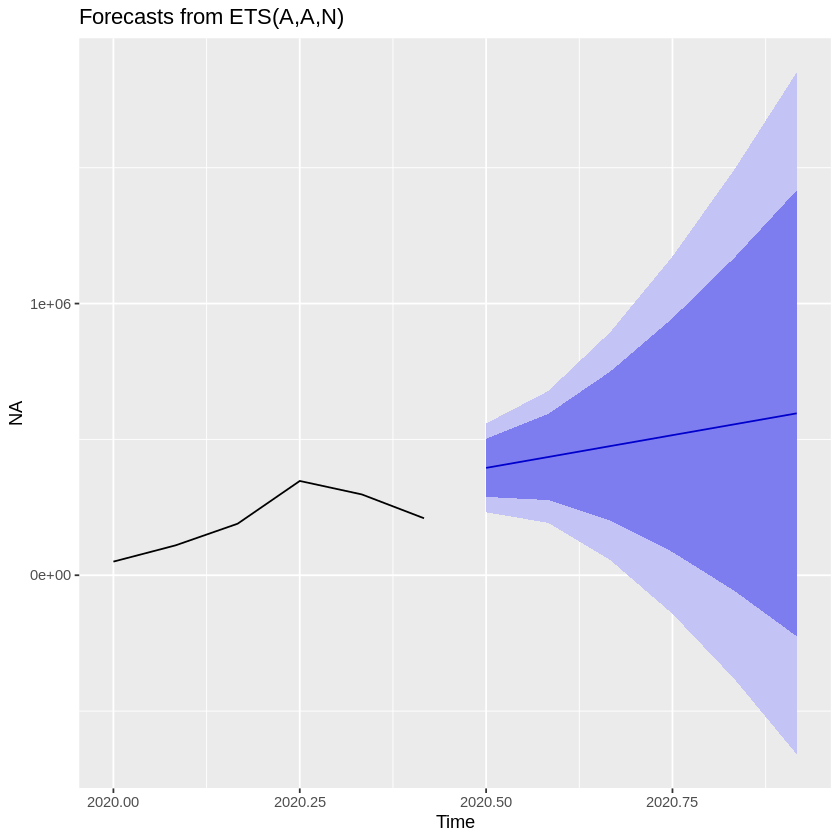

In [ ]:
fig4 <- autoplot(forecast(fit1, h = 6))
fig4

In [ ]:
?ets
fit1b <- ets(d_ts, model = c("AAA"), damped = TRUE)
summary(fit1b)

Warning message in ets(d_ts, model = c("AAA"), damped = TRUE):
“Not enough data to use damping”


ETS(A,A,N) 

Call:
 ets(y = d_ts, model = c("AAA"), damped = TRUE) 

  Smoothing parameters:
    alpha = 0.0962 
    beta  = 1 

  Initial states:
    l = 50221.5739 
    b = 59821.5944 

  sigma:  83414.45
Training set error measures:
                    ME     RMSE      MAE       MPE     MAPE MASE       ACF1
Training set -34102.96 83414.45 66459.49 -37.54637 46.86938  NaN 0.08220422

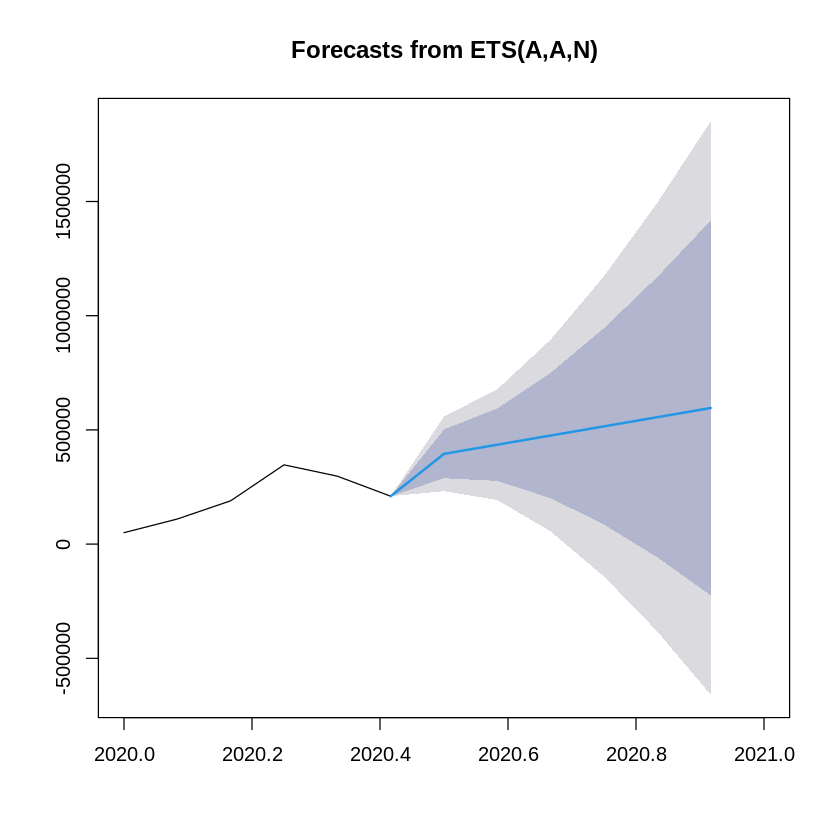

In [ ]:
fc1 <- forecast(fit1b, h = 6)
plot(fc1, showgap = FALSE)

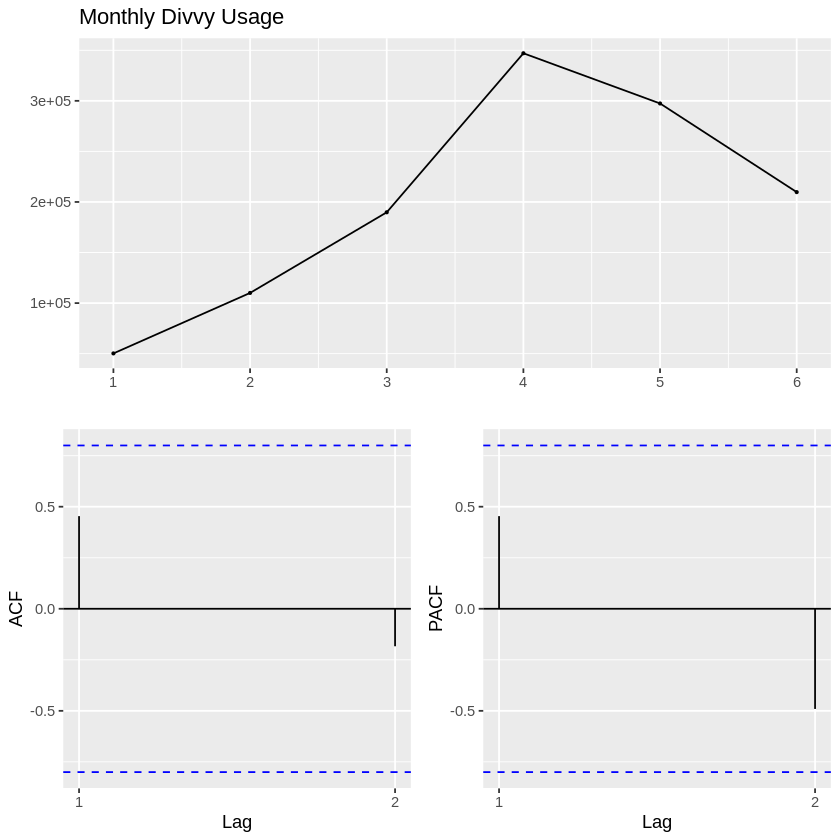

In [ ]:
#arima
ggtsdisplay(divvy_m_train, main="Monthly Divvy Usage")


Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


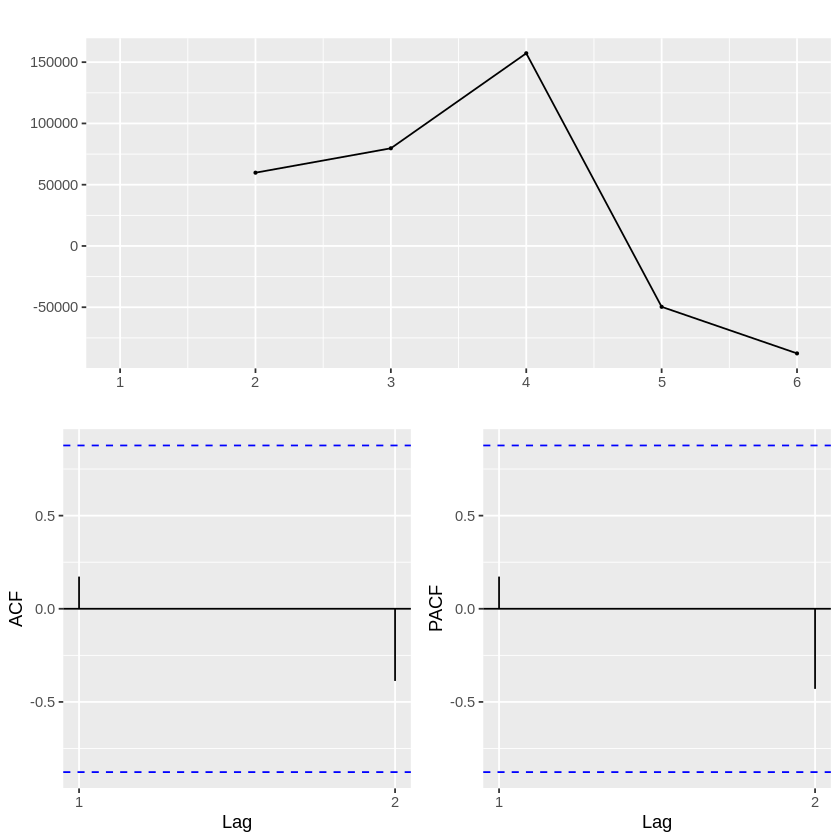

In [ ]:
ggtsdisplay(diff(divvy_m_train))
